## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





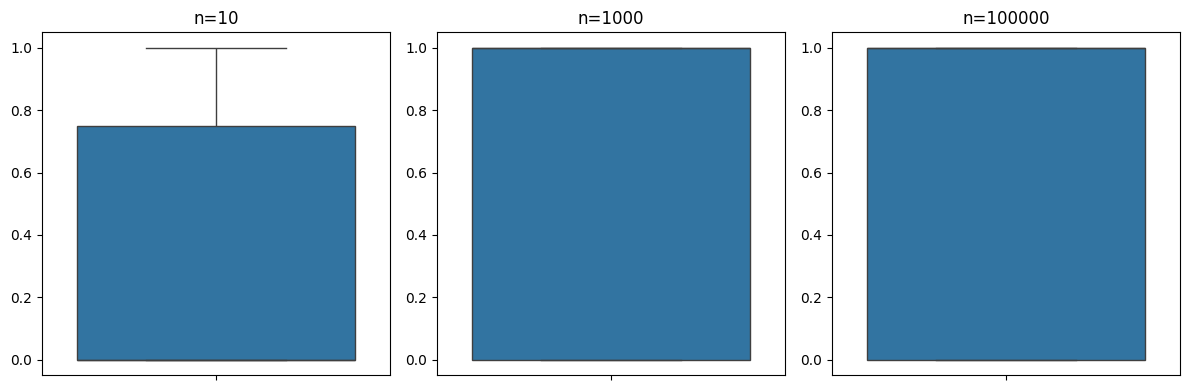

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def lancio(n):
    outcome= []

    for i in range(n):
        if np.random.rand() < 0.5:
            outcome.append(1)
        else:
            outcome.append(0)

    return outcome
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.boxplot(data=lancio(10), ax=axes[0])
axes[0].set_title('n=10')

sns.boxplot(data=lancio(1000), ax=axes[1])
axes[1].set_title('n=1000')

sns.boxplot(data=lancio(100000), ax=axes[2])
axes[2].set_title('n=100000')

plt.tight_layout()
plt.show()

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
il numero di colonne è:  12
il numero di righe è:  891
il numero di valori mancanti per colonna è:  [0, 0, 0, 0, 0, 177, 0, 0, 0, 0, 687, 2]
il numero di valori mancanti per colonna è:  [0, 0, 0, 0, 0, 177, 0, 0, 0, 0, 687, 0]
il numero di righe duplicate è:  0
la media dell'età per classe è: 
 Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


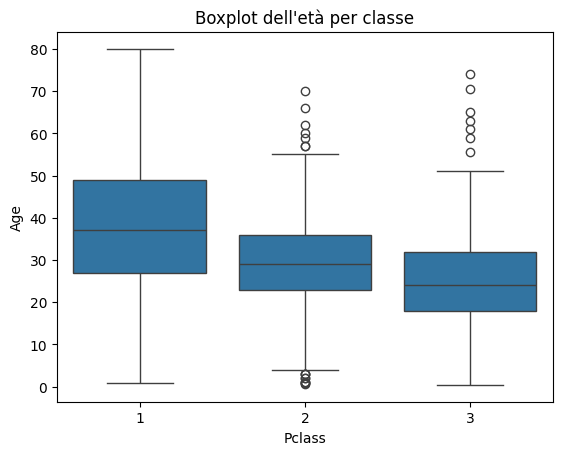

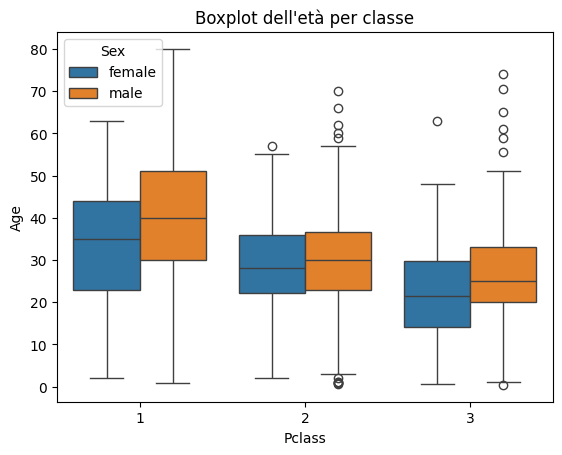

In [ ]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
print(df.columns)
print("il numero di colonne è: ",len(df.columns))
print("il numero di righe è: ",len(df.index))
miss=[int(df[colonna].isnull().sum()) for colonna in df.columns]
print("il numero di valori mancanti per colonna è: ",miss)
moda= df['Embarked'].mode()
df.fillna({'Embarked': moda[0]}, inplace=True)
print('==================================================================================================================')
miss=[int(df[colonna].isnull().sum()) for colonna in df.columns]---
print("il numero di valori mancanti per colonna è: ",miss)
df.dropna(subset=['Age'], inplace=True)
print("il numero di righe duplicate è: ", df.duplicated().sum())
media_per_classe= df.groupby('Pclass')['Age'].mean()
print("la media dell'età per classe è: \n", media_per_classe)
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Boxplot dell\'età per classe')
plt.show()
dfmale=df.copy()
dfmale
sns.boxplot(x='Pclass', y='Age', hue='Sex',data=df)
plt.title('Boxplot dell\'età per classe')
plt.show()


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

species
setosa        50
versicolor    50
virginica     50
dtype: int64
lunghezza media petalo per specie:
 species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64
larghezza media petalo per specie:
 species
setosa        3.428
versicolor    2.770
virginica     2.974
Name: sepal_width, dtype: float64
area media petalo per specie:
 species
setosa         0.3656
versicolor     5.7204
virginica     11.2962
Name: area_petalo, dtype: float64


<Axes: xlabel='area_petalo', ylabel='species'>

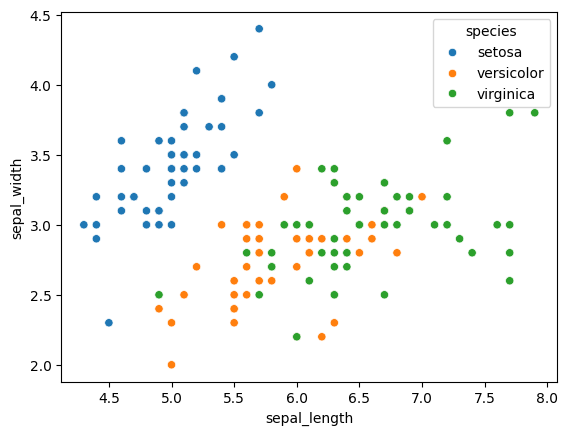

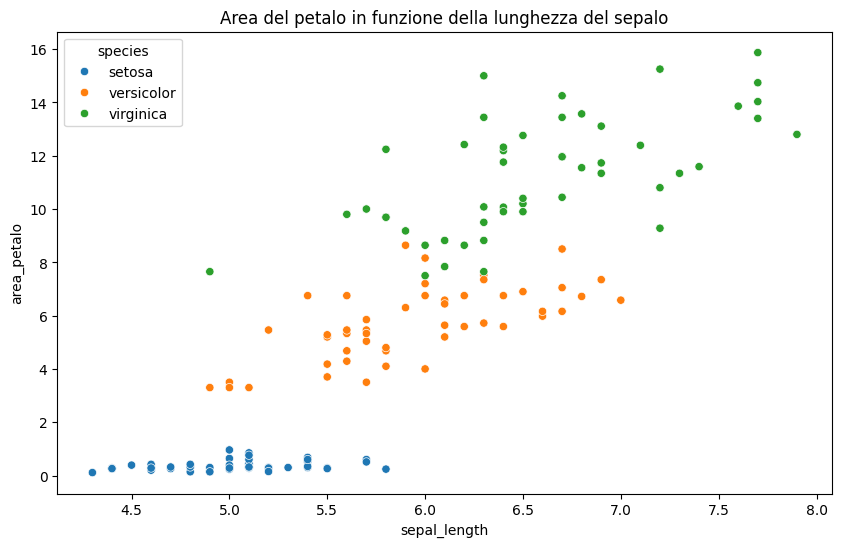

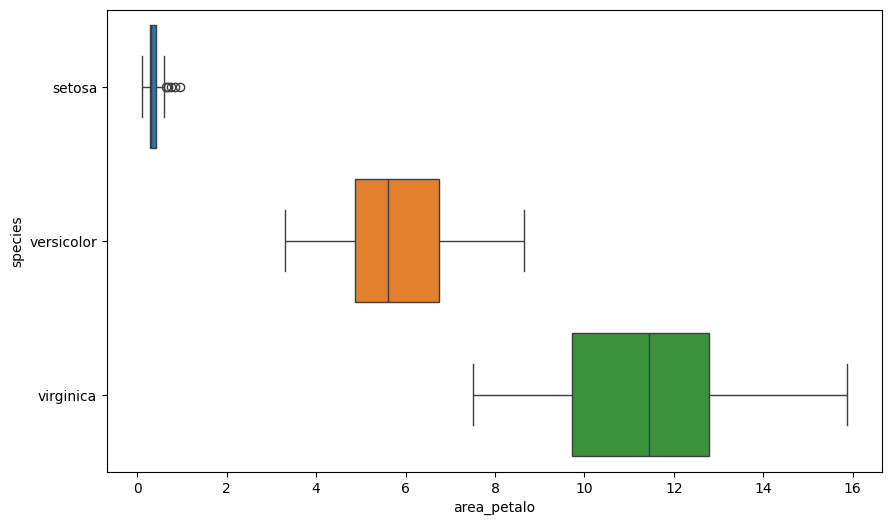

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head(10)
diz={}
for item in df.species:
    if item in diz:
        diz[item] += 1
    else:
        diz[item] = 1
#print(diz)
conteggi = df.groupby('species').size()
print(conteggi)

lunghezza_media_pet=df.groupby('species')['sepal_length'].mean()
larghezza_media_pet=df.groupby('species')['sepal_width'].mean()
print("lunghezza media petalo per specie:\n", lunghezza_media_pet)
print("larghezza media petalo per specie:\n", larghezza_media_pet)

sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
df['area_petalo']= df['petal_length'] * df['petal_width']
print("area media petalo per specie:\n", df.groupby('species')['area_petalo'].mean())
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='area_petalo', hue='species', data=df)
plt.title('Area del petalo in funzione della lunghezza del sepalo')

plt.figure(figsize=(10, 6))
sns.boxplot(x='area_petalo', y='species', hue='species', data=df)